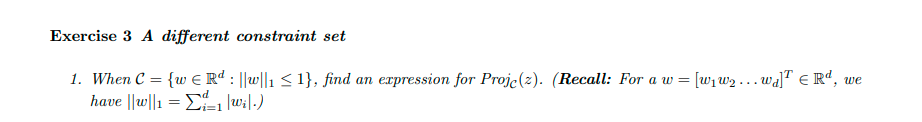

EX-1
we first calculate the projection of an arbitrary vector $ \mathbf{z} $ onto the closed set $ C $ which containing all vectors having their $ \ell_1 $ norm less than or equal to 1 involves two steps:

1. Compute the $ \ell_1 $ norm of the vector $ \mathbf{z} $, denoted as $ ||\mathbf{z}||_1 $.
2. If $ ||\mathbf{z}||_1 \leq 1 $, then the projection of $ \mathbf{z} $ onto $ C $ is simply $ \mathbf{z} $ itself. Otherwise, we need to scale each component of $ \mathbf{z} $ such that the resulting vector has an $ \ell_1 $ norm of 1.

To achieve this, we divide each component of $ \mathbf{z} $ by its $ \ell_1 $ norm $ ||\mathbf{z}||_1 $ to normalize the vector, ensuring that its $ \ell_1 $ norm becomes 1. The resulting normalized vector is then the projection of $ \mathbf{z} $ onto the closed set $ C $.

Mathematically, the projection of an arbitrary vector $ \mathbf{z} $ onto the closed set $ C $ can be defined as follows:

$$ \text{Proj}_C(\mathbf{z})
   = \begin{cases}
\mathbf{z} & \text{if } ||\mathbf{z}||_1 \leq 1 \\
\frac{\mathbf{z}}{||\mathbf{z}||_1} & \text{otherwise}
\end{cases} $$

   
    



In [1]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()



# Access the features (X) and target (y) variables
X = wine_data.data  # Features
y = wine_data.target  # Target variable
transformed_label=[1]*len(wine_data.data)
for i in range(len(y)):
  if y[i]!=1:
    transformed_label[i]=-1

In [2]:
#Normalising the columns of A
A=wine_data.data
import numpy as np



# Normalize the columns of A
min_vals = np.min(A, axis=0)  # Minimum values of each column
max_vals = np.max(A, axis=0)  # Maximum values of each column

# Min-Max normalization
A_normalized = -1 + 2 * ((A - min_vals) / (max_vals - min_vals))

In [3]:
import random

# Generate index array
index_array = [i for i in range(len(wine_data.data))]

# Shuffle the index array
random.shuffle(index_array)

# Define the size of training data
train_size = int(0.8 * len(index_array))

# Split the shuffled index array into train and test index arrays
train_index = index_array[:train_size]
test_index = index_array[train_size:]


In [4]:
train_data1=[A[i] for i in train_index]
test_data1=[A[i] for i in test_index]
train_data=np.array(train_data1)
test_data=np.array(test_data1)
train_label1=[transformed_label[i] for i in train_index]
train_label=np.array(train_label1)
test_label1=[transformed_label[i] for i in test_index]
test_label=np.array(test_label1)

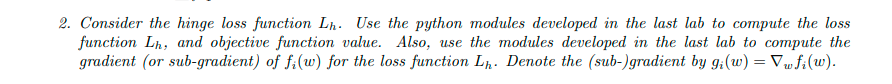Ex-2

In [5]:
import numpy as np

# Define the hinge loss function Lh
def hinge_loss(y, w, x):
  n=len(w)
  x_=x.reshape(n,1)
  return np.maximum(0, 1 - y *w.T@x)
def log_loss(y,w,x):
  z=-y*w.T@x
  z_star=np.clip(z,-20,20)
  return np.log(1+np.exp(z_star))
def squared_loss(y,w,x):
  n=len(w)
  x_=x.reshape(n,1)
  z=np.maximum(0,1-y*w.T@x_)
  return z**2



# Define the objective function f(w)
def objective_function(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    hinge_loss_term = (1 / n) * np.sum([hinge_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + hinge_loss_term

def objective_log(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    log_loss_term = (1 / n) * np.sum([log_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + log_loss_term

def objective_squared(w, lambd, X, y):
    n = len(y)
    regularization_term = 0.5 * lambd * np.linalg.norm(w, ord=2)**2
    squared_loss_term = (1 / n) * np.sum([squared_loss(y[i], w, X[i]) for i in range(n)])
    return regularization_term + squared_loss_term


# Define the gradient or sub-gradient function for fi(w) with the hinge loss function Lh
def gradient_hinge_loss(y, w, x, lamda,X):
    n=len(X)
    if 1 - y * w.T@x > 0:
        return (lamda*w/n) -(y * x)/n
    else:
        return (lamda*w/n) + np.zeros_like(w)

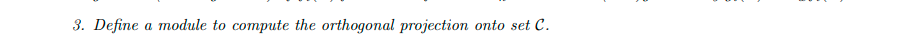

In [6]:
import numpy as np

def projection_function(z):
    # Compute the L1 norm of z
    l1_norm = np.linalg.norm(z, ord=1)

    # Check if the L1 norm is less than or equal to 1
    if l1_norm <= 1:
        # If so, return z itself
        return z
    else:
        # Otherwise, normalize z to have an L1 norm of 1
        return z / l1_norm


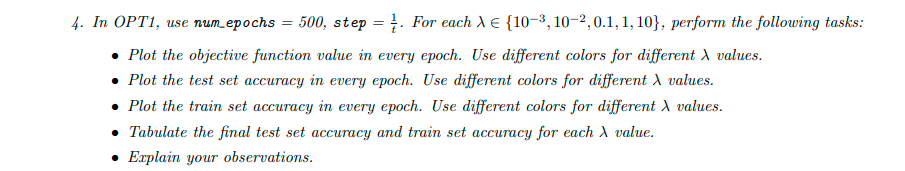

**Plotting the objective values vs different lambda values**

In [10]:
def Objective_value(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_function(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [11]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val=[]
for i in lam:
  a=Objective_value(data,label,i,500)
  obj_val.append(a)

In [12]:
import matplotlib.pyplot as plt

def plot_lambda_values(obj):
    num_epochs = len(obj[0])

    # Generate colors for each lambda value
    colors = ['b', 'g', 'm', 'c', 'r']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

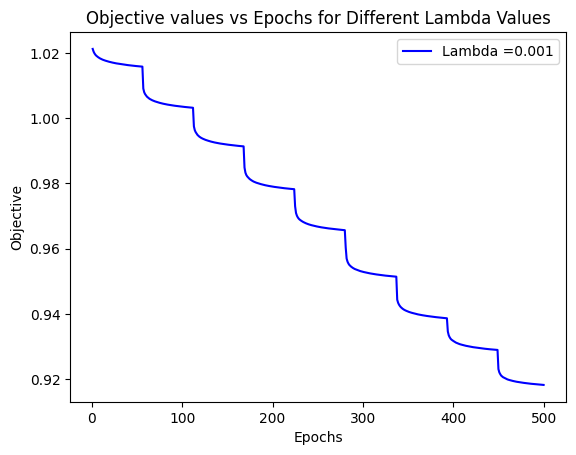

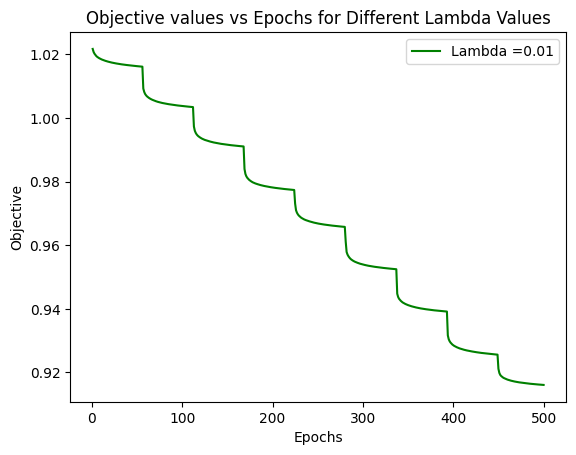

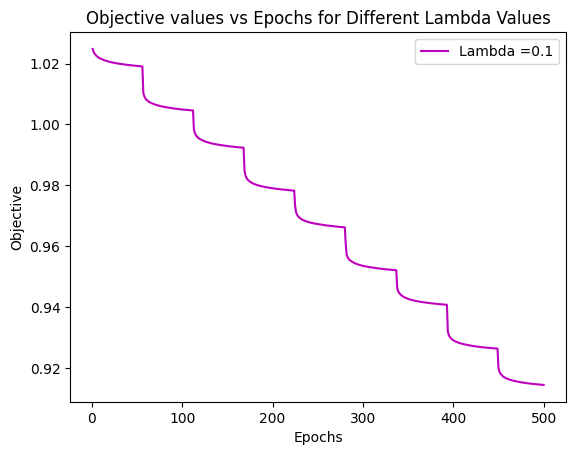

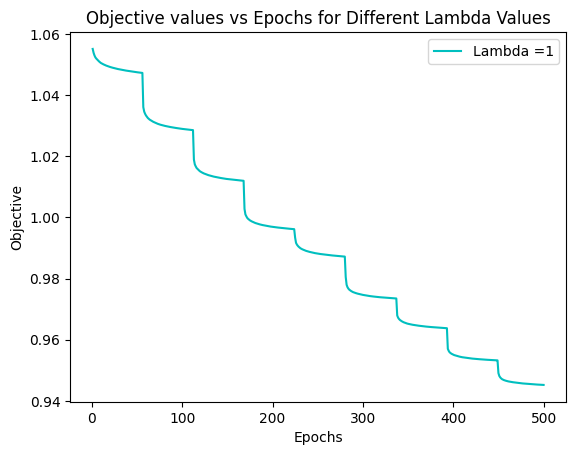

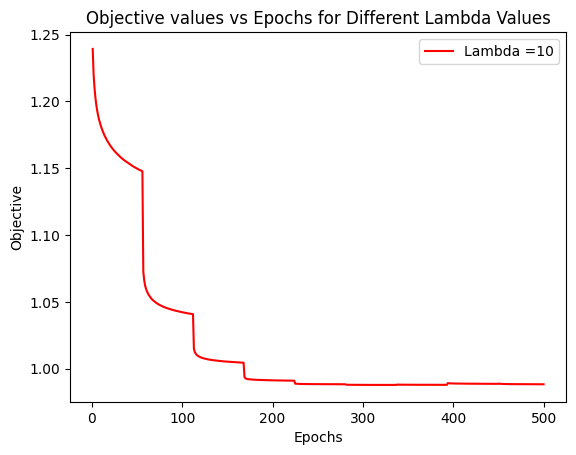

In [13]:
colors = ['b', 'g', 'm', 'c', 'r']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective')
    plt.title('Objective values vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

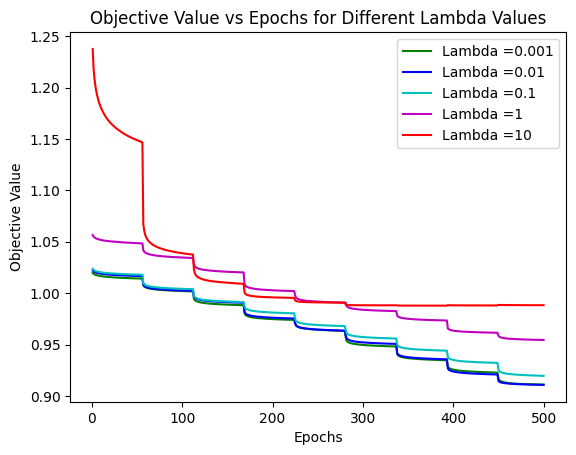

In [ ]:
plot_lambda_values(obj_val)

**Observations:**

In the current analysis, the closed-set objective values appear notably smaller compared to previous instances, especially evident when considering a lambda value of 10. Previously, even with lambda set to 10, the maximum objective value reached 35, whereas here, the objective value does not exceed 2 for any lambda value. Moreover, with an increase in the number of epochs, the objective function values decrease significantly. Additionally, a notable trend emerges where lower lambda values correspond to minimized objective values. This suggests that as the regularization strength diminishes (indicated by lower lambda values), the optimization process tends to prioritize fitting the data more closely, resulting in decreased objective values. This behavior underscores the interplay between regularization strength, optimization epochs, and objective function values in the closed-set analysis.

**plotting the train set accuracy in each epoch**

In [16]:
def predict1(w,x):
  if w.T@x>0:
    return 1
  elif w.T@x<0:
    return -1
def accuracy1(data,label,model_w):
  k=0
  n=len(data)
  d=data.shape[1]
  for i in range(n):
    a=predict1(model_w,data[i].reshape(d,1))
    if a==label[i]:
      k+=1
  acc=float((k/n)*100)
  return acc

def set_acc(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = gradient_hinge_loss(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [17]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val=[]
for i in lam:
  a1=set_acc(data1,label1,i,500)
  acc_val.append(a1)

In [18]:
import matplotlib.pyplot as plt

def plot_acc_values(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

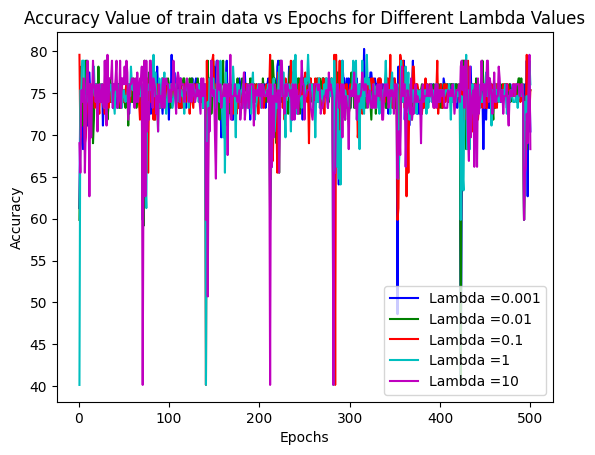

In [19]:
plot_acc_values(acc_val)

In [20]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val2=[]
for i in lam:
  a2=set_acc(data2,label2,i,500)
  acc_val2.append(a2)

In [21]:
def plot_acc_values2(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['g', 'b', 'c', 'r', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

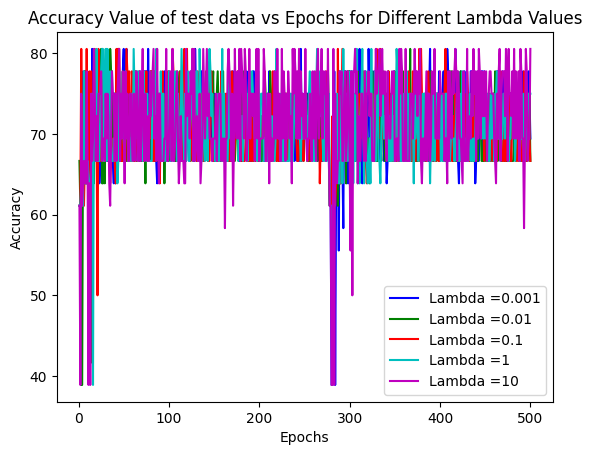

In [ ]:
plot_acc_values2(acc_val2)

**Observations::**

In the training data, the accuracy consistently ranges between 60% to 70%, indicating moderate performance in classifying the data points correctly. However, when evaluating the model on unseen test data, the accuracy notably improves, ranging between 75% to 85%. This discrepancy suggests that the model might be overfitting to the training data, performing relatively better on data it has not encountered before. It implies that the model generalizes well to new, unseen instances, which is a positive indication of its robustness. Nevertheless, further analysis and fine-tuning might be necessary to address potential overfitting and improve overall performance on both training and test datasets

**Tabulating the values of accuracies for each lambda values**

In [22]:
for i in acc_val:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val2:
  for j in range(len(i)):
    i[j]=round(i[j],2)


In [23]:
import pandas as pd

# Create an empty DataFrame
empty_df = pd.DataFrame()
empty_df["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val[0],acc_val2[0]))
empty_df["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val[1],acc_val2[1]))
empty_df["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val[2],acc_val2[2]))
empty_df["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val[3],acc_val2[3]))
empty_df["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val[4],acc_val2[4]))
empty_df

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(61.27, 61.11)","(59.86, 69.44)","(79.58, 61.11)","(40.14, 61.11)","(69.01, 61.11)"
1,"(76.06, 61.11)","(69.72, 61.11)","(69.72, 61.11)","(75.35, 61.11)","(65.49, 38.89)"
2,"(71.83, 61.11)","(78.17, 61.11)","(76.76, 63.89)","(75.35, 58.33)","(75.35, 61.11)"
3,"(69.01, 61.11)","(71.13, 66.67)","(76.76, 61.11)","(78.87, 38.89)","(75.35, 69.44)"
4,"(68.31, 75.0)","(74.65, 66.67)","(76.06, 38.89)","(78.87, 61.11)","(73.94, 61.11)"
...,...,...,...,...,...
495,"(78.87, 72.22)","(68.31, 75.0)","(79.58, 72.22)","(74.65, 77.78)","(72.54, 77.78)"
496,"(62.68, 75.0)","(76.76, 75.0)","(73.94, 72.22)","(70.42, 77.78)","(69.01, 72.22)"
497,"(78.87, 69.44)","(75.35, 69.44)","(75.35, 77.78)","(73.24, 69.44)","(75.35, 75.0)"
498,"(76.06, 77.78)","(75.35, 72.22)","(72.54, 75.0)","(78.87, 75.0)","(79.58, 72.22)"


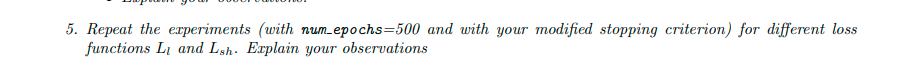

**Repeating the experiments when logistic loss is considered**

In [24]:
def logistic_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  z_star=np.clip(z,-500,500)
  return lamda*w/n + (1/n)*(-y*x*(np.exp(z_star-1)))/(1+np.exp(z_star-1))

def squared_hinge_loss_gradient(y,w,x,lamda,X):
  n=len(X)
  z=1-y*w.T@x
  if z>0:
    return (lamda*w/n) +(1/n)*(-2*y*x)*(z)
  else:
    return lamda*w/n

In [25]:
def Objective_value_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = objective_log(w, lambda_val, data, label)
        objective_values.append(val)

    return objective_values

In [26]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_log=[]
for i in lam:
  b=Objective_value_logistic(data,label,i,500)
  obj_val_log.append(b)

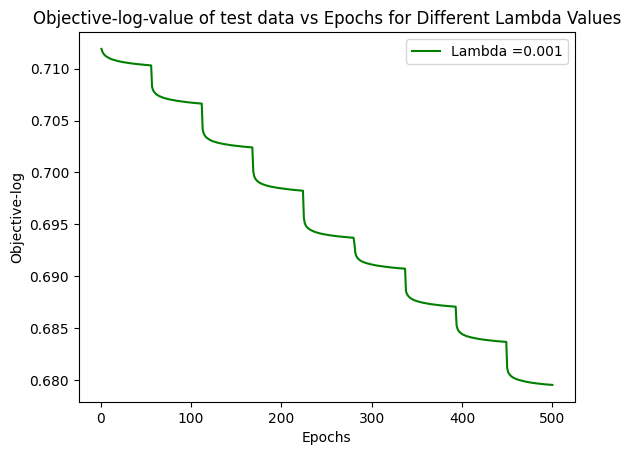

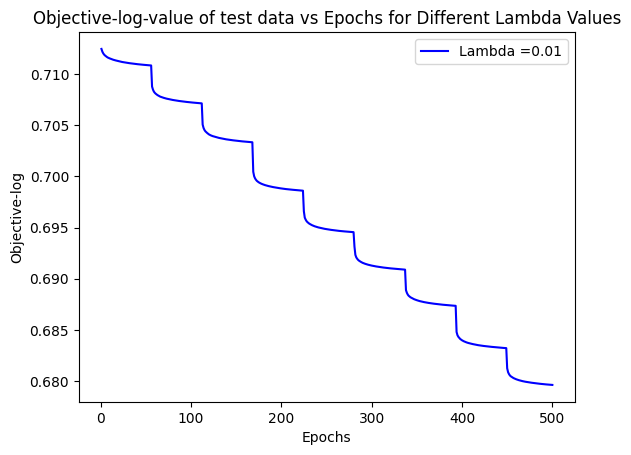

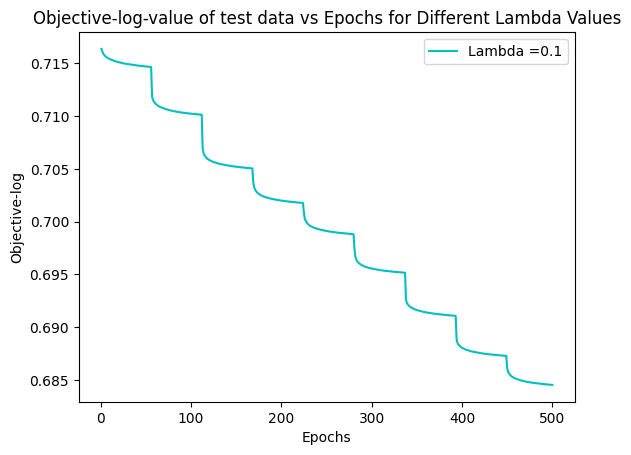

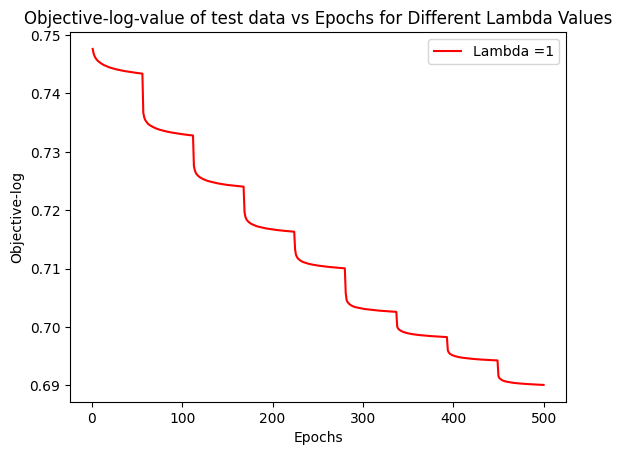

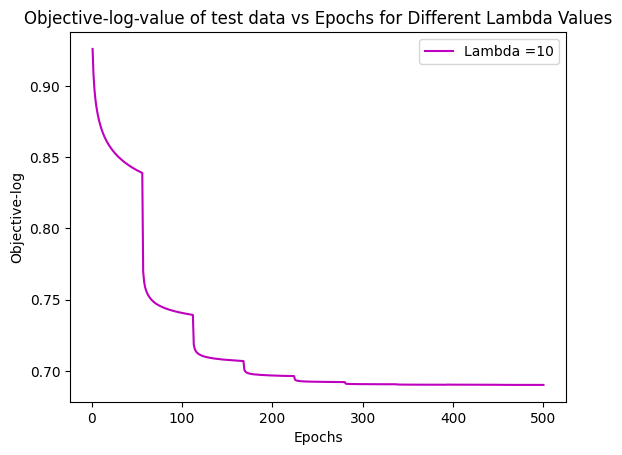

In [27]:
colors = ['g', 'b', 'c', 'r', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-log')
    plt.title('Objective-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

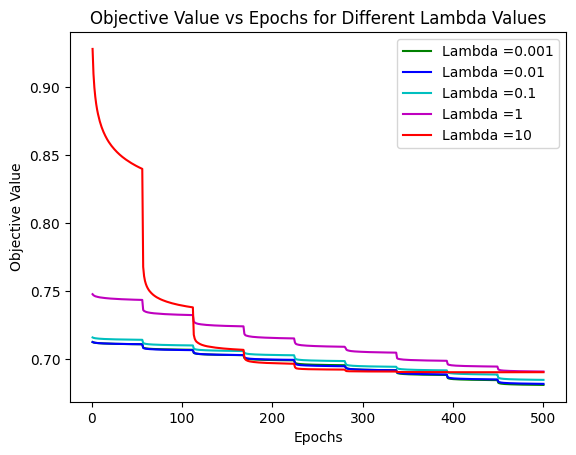

In [ ]:
plot_lambda_values(obj_val_log)# specifically for log objective

In [28]:
def set_acc_logistic(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = logistic_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [29]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_log=[]
for i in lam:
  c=set_acc_logistic(data1,label1,i,500)
  acc_val_log.append(c)

In [30]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_log2=[]
for i in lam:
  d=set_acc_logistic(data2,label2,i,500)
  acc_val_log2.append(d)

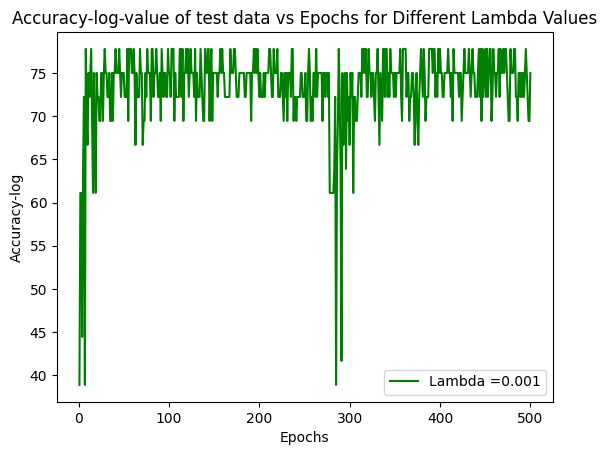

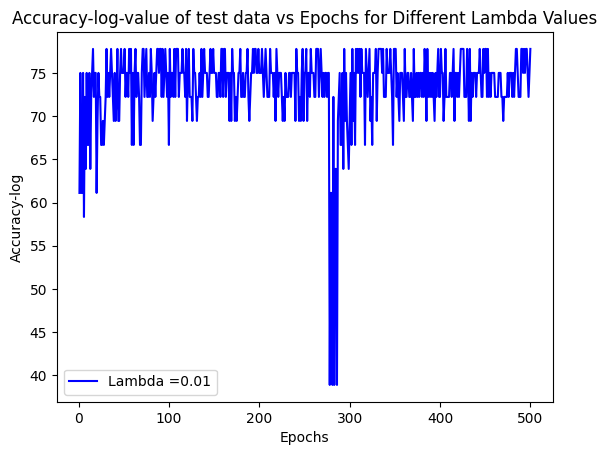

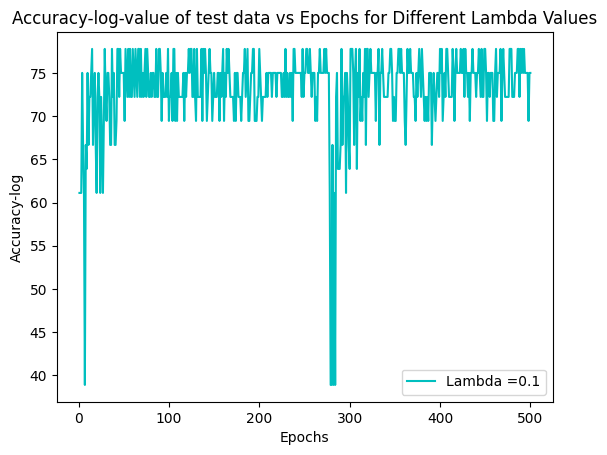

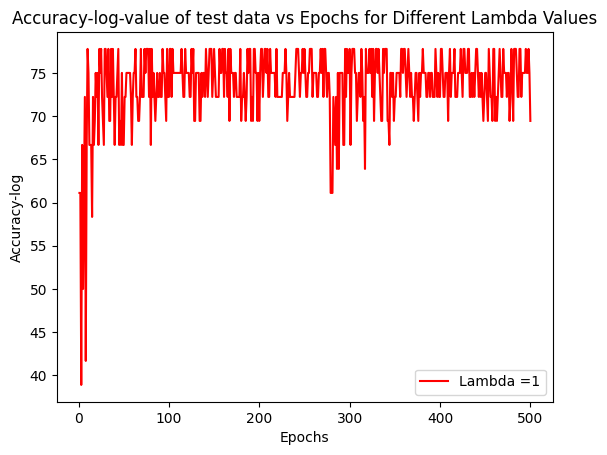

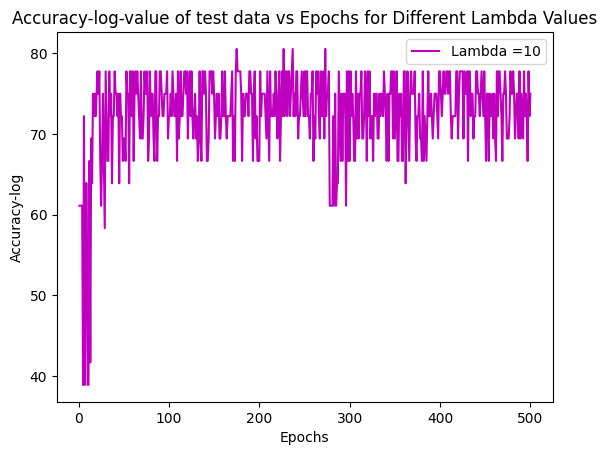

In [31]:
colors = ['g', 'b', 'c', 'r', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

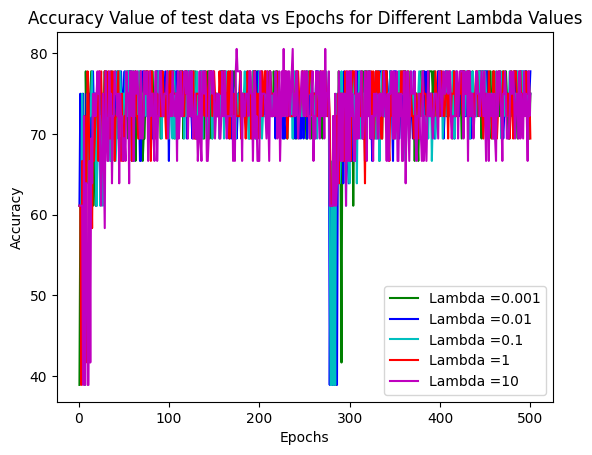

In [32]:
plot_acc_values2(acc_val_log2)

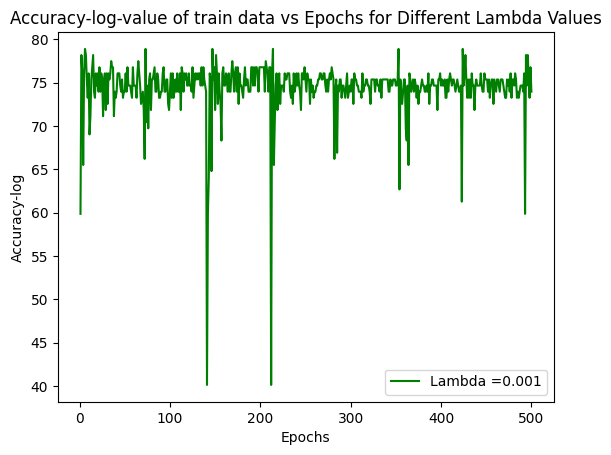

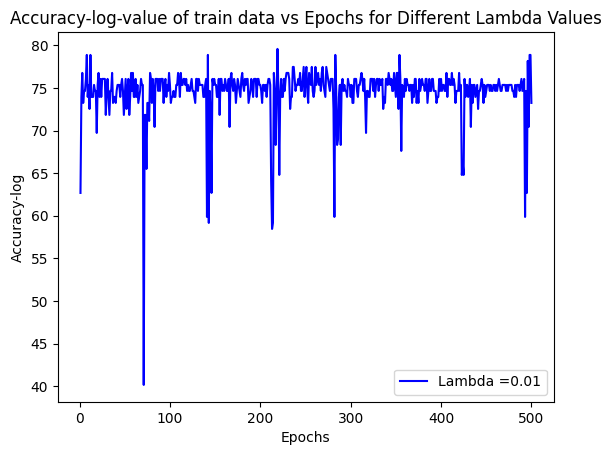

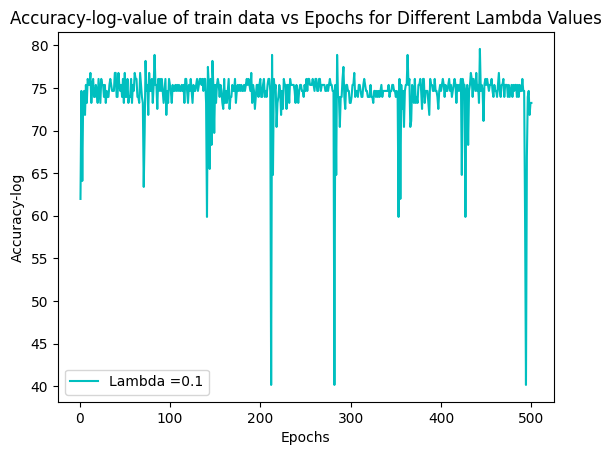

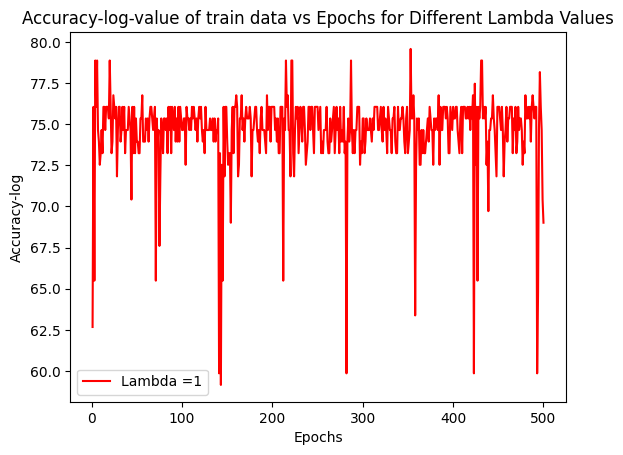

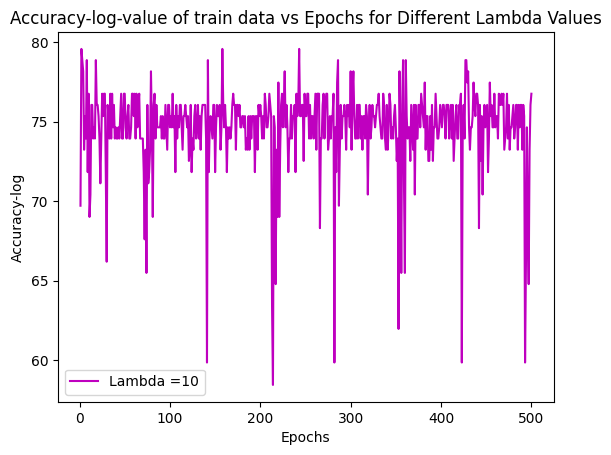

In [33]:
colors = ['g', 'b', 'c', 'r', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_log):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-log')
    plt.title('Accuracy-log-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

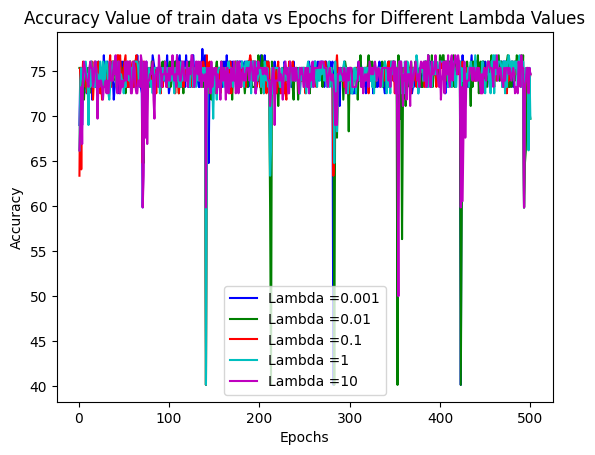

In [ ]:
plot_acc_values(acc_val_log)

**Repeatin The experiments when loss function is considerd as squared hinge**

In [34]:
def Objective_value_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    objective_values = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val2 = objective_squared(w, lambda_val, data, label)
        objective_values.append(val2)

    return objective_values

In [35]:
lam=[1e-3,1e-2,1e-1,1,10]
data=A_normalized
label=transformed_label

obj_val_sqr=[]
for i in lam:
  e=Objective_value_squared(data,label,i,500)
  obj_val_sqr.append(e)

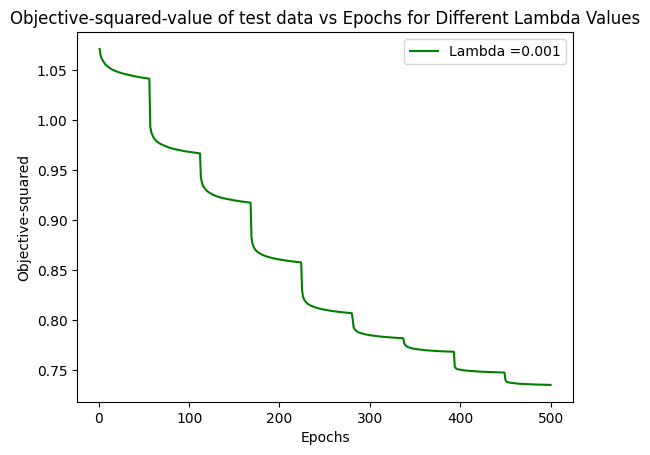

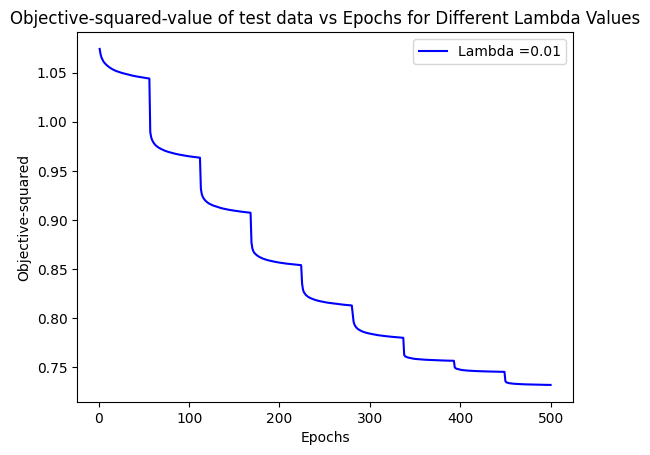

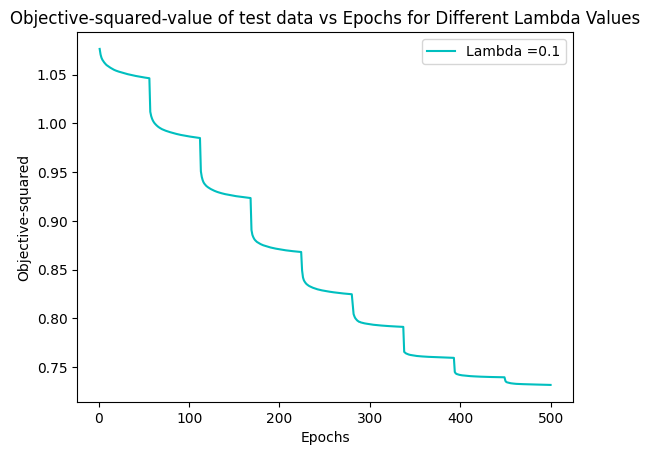

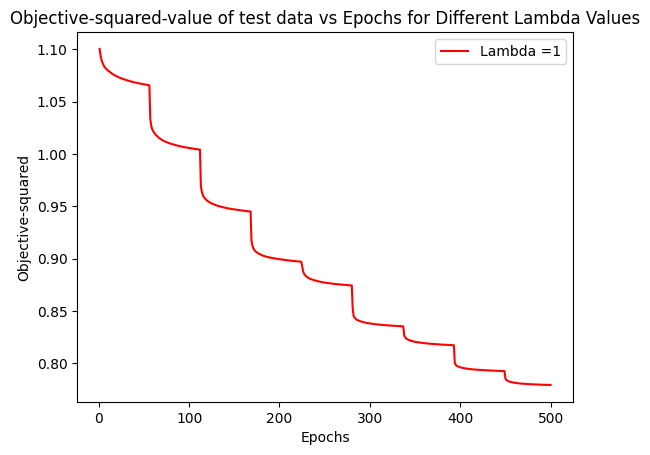

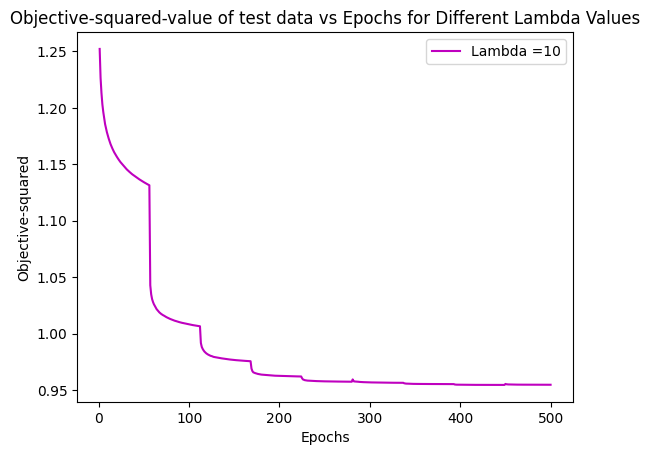

In [36]:
colors = ['g', 'b', 'c', 'r', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(obj_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective-squared')
    plt.title('Objective-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [37]:
import matplotlib.pyplot as plt

def plot_lambda_values3(obj):
    num_epochs = len(obj[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(obj):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Objective Value')
    plt.title('Objective Value  of squared vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

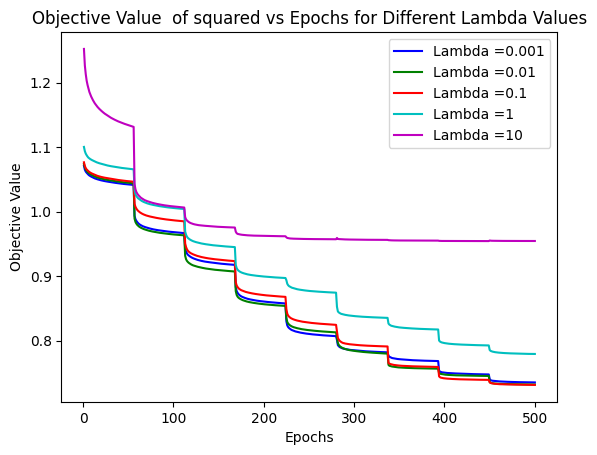

In [38]:
plot_lambda_values3(obj_val_sqr)

In [39]:
def set_acc_squared(data, label, lambda_val, num_epochs):
    t = 1
    d = data.shape[1]
    w = np.ones((d, 1))

    test_set_accuracy = []

    arr = np.arange(data.shape[0])
    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            random_index = random.randint(0, len(data) - 1)
            x = data[random_index].reshape(d, 1)
            y = label[random_index]
            eta_t = 1 / t
            gr = squared_hinge_loss_gradient(y, w, x,lambda_val,data)
            z = w - eta_t * gr
            w = projection_function(z)
            t = t + 1
            if t > 1e4:
                t = 1

        val = accuracy1(data, label,w)
        test_set_accuracy.append(val)

    return test_set_accuracy

In [40]:
lam=[1e-3,1e-2,1e-1,1,10]
data2=test_data
label2=test_label

acc_val_sqr=[]
for i in lam:
  d1=set_acc_squared(data2,label2,i,500)
  acc_val_sqr.append(d1)

In [41]:
import matplotlib.pyplot as plt

def plot_acc_sqrtest(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of test data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

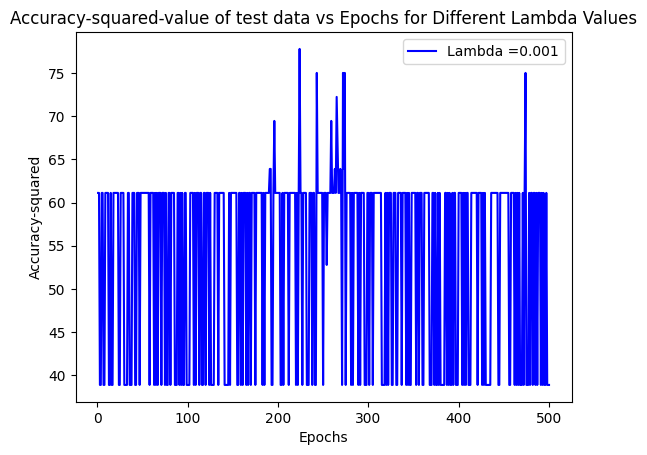

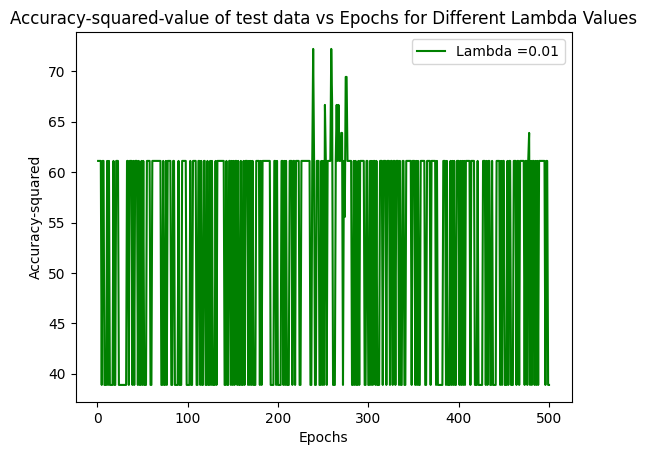

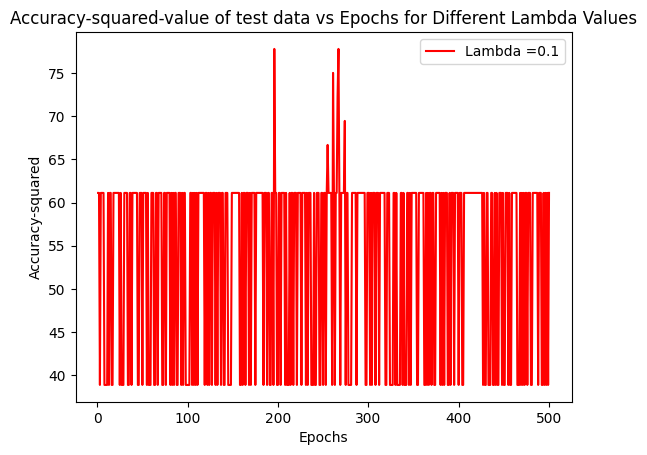

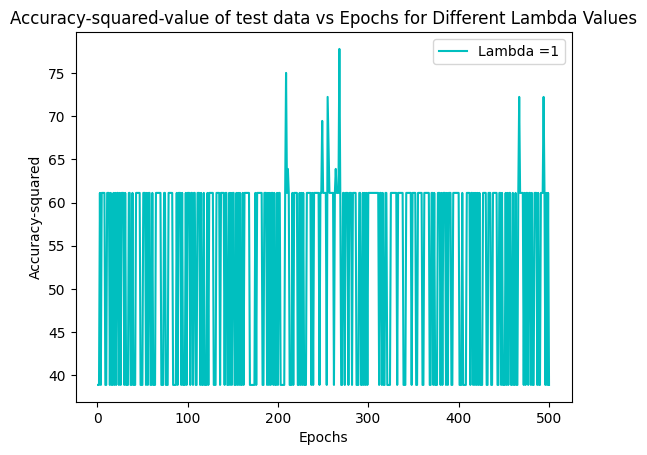

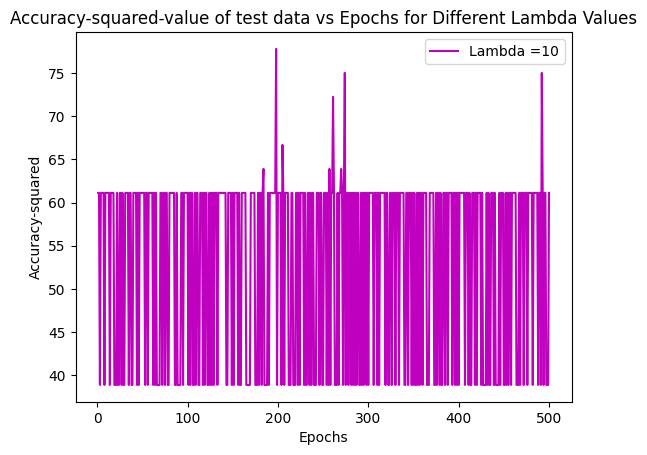

In [42]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_sqr):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-squared')
    plt.title('Accuracy-squared-value of test data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

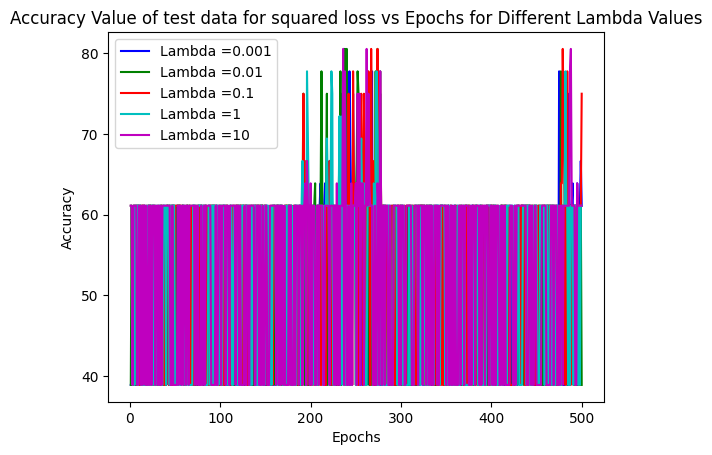

In [ ]:
plot_acc_sqrtest(acc_val_sqr)

In [43]:
import matplotlib.pyplot as plt

def plot_acc_sqrtrain(acc_val):
    num_epochs = len(acc_val[0])  # Assuming all lists have the same length

    # Generate colors for each lambda value
    colors = ['b', 'g', 'r', 'c', 'm']
    lam=[1e-3,1e-2,1e-1,1,10]


    for i, lambda_list in enumerate(acc_val):
        plt.plot(range(1, num_epochs + 1), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Value of train data for squared loss vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

In [44]:
lam=[1e-3,1e-2,1e-1,1,10]
data1=train_data
label1=train_label

acc_val_sqr2=[]
for i in lam:
  d2=set_acc_squared(data1,label1,i,500)
  acc_val_sqr2.append(d2)

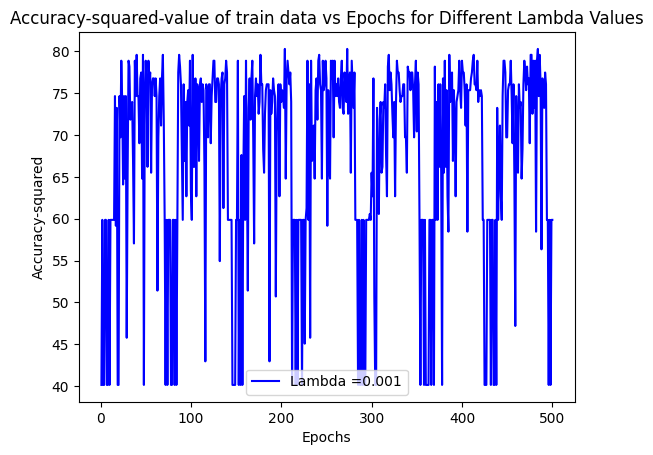

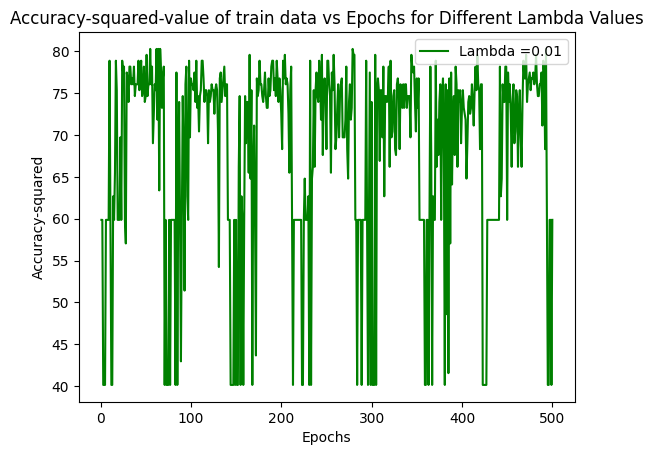

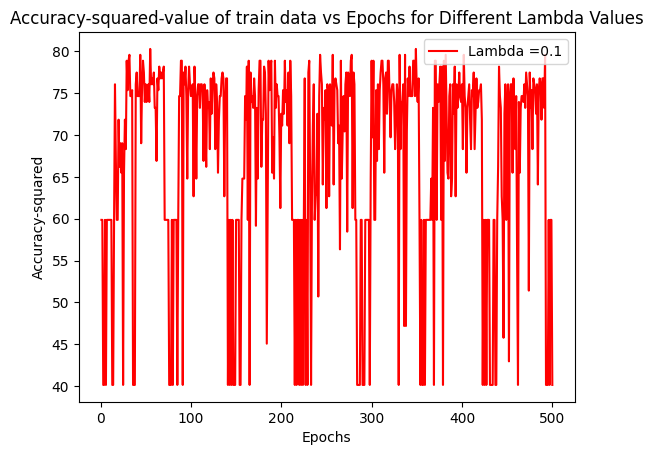

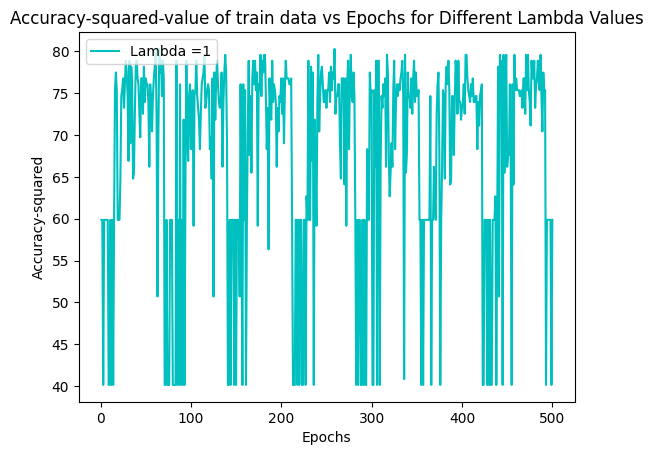

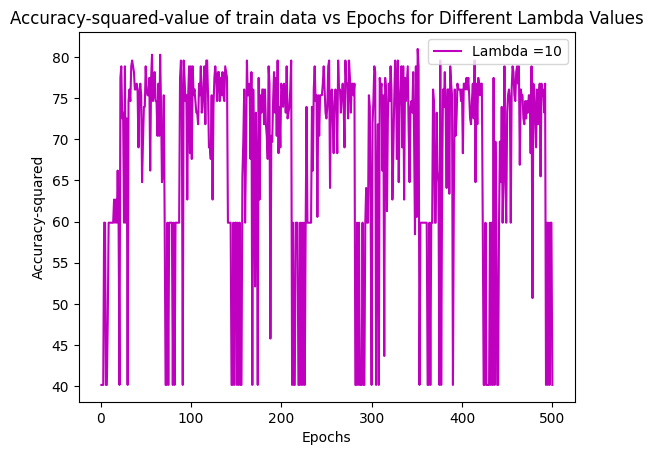

In [45]:
colors = ['b', 'g', 'r', 'c', 'm']
lam=[1e-3,1e-2,1e-1,1,10]


for i, lambda_list in enumerate(acc_val_sqr2):
    plt.plot(range(1, 501), lambda_list, color=colors[i], label=f'Lambda ={lam[i]}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy-squared')
    plt.title('Accuracy-squared-value of train data vs Epochs for Different Lambda Values')
    plt.legend()
    plt.show()

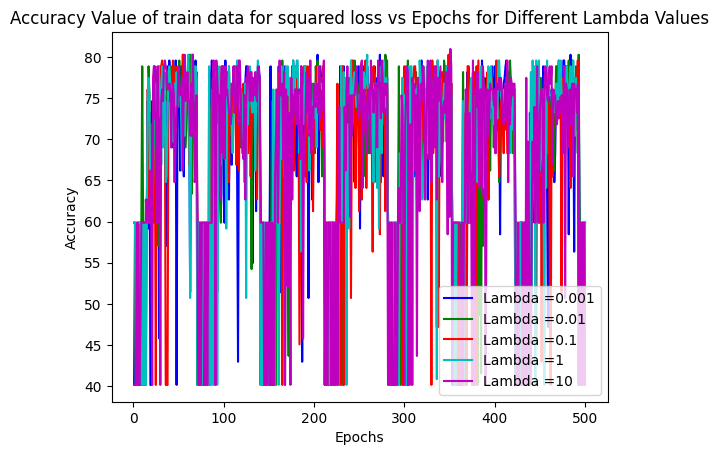

In [46]:
plot_acc_sqrtrain(acc_val_sqr2)

**Tabulating The values for squared Objective**

In [47]:
for i in acc_val_sqr2:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_sqr:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [48]:
import pandas as pd

# Create an empty DataFrame
df_squared_accuracy = pd.DataFrame()
df_squared_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[0],acc_val_sqr[0]))
df_squared_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[1],acc_val_sqr[1]))
df_squared_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[2],acc_val_sqr[2]))
df_squared_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[3],acc_val_sqr[3]))
df_squared_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_sqr2[4],acc_val_sqr[4]))
df_squared_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(40.14, 61.11)","(59.86, 61.11)","(59.86, 61.11)","(59.86, 38.89)","(40.14, 61.11)"
1,"(59.86, 61.11)","(59.86, 61.11)","(59.86, 61.11)","(59.86, 38.89)","(40.14, 61.11)"
2,"(40.14, 38.89)","(40.14, 61.11)","(40.14, 38.89)","(40.14, 61.11)","(40.14, 38.89)"
3,"(40.14, 38.89)","(40.14, 61.11)","(40.14, 61.11)","(59.86, 38.89)","(59.86, 61.11)"
4,"(59.86, 61.11)","(40.14, 38.89)","(59.86, 61.11)","(59.86, 61.11)","(59.86, 61.11)"
...,...,...,...,...,...
495,"(40.14, 38.89)","(40.14, 38.89)","(59.86, 61.11)","(59.86, 38.89)","(59.86, 61.11)"
496,"(59.86, 61.11)","(59.86, 61.11)","(40.14, 38.89)","(59.86, 61.11)","(40.14, 38.89)"
497,"(40.14, 38.89)","(59.86, 61.11)","(59.86, 61.11)","(59.86, 38.89)","(59.86, 38.89)"
498,"(59.86, 38.89)","(40.14, 38.89)","(59.86, 38.89)","(40.14, 61.11)","(59.86, 38.89)"


**Tabulating The values for Logistic Objective**

In [ ]:
for i in acc_val_log:
  for j in range(len(i)):
    i[j]=round(i[j],2)
for i in acc_val_log2:
  for j in range(len(i)):
    i[j]=round(i[j],2)

In [ ]:
# Create an empty DataFrame
df_logistic_accuracy = pd.DataFrame()
df_logistic_accuracy["Lambda=0.001(Train_acc,Test_acc)"]=list(zip(acc_val_log[0],acc_val_log2[0]))
df_logistic_accuracy["Lambda=0.01(Train_acc,Test_acc)"]=list(zip(acc_val_log[1],acc_val_log2[1]))
df_logistic_accuracy["Lambda=0.1(Train_acc,Test_acc)"]=list(zip(acc_val_log[2],acc_val_log2[2]))
df_logistic_accuracy["Lambda=1(Train_acc,Test_acc)"]=list(zip(acc_val_log[3],acc_val_log2[3]))
df_logistic_accuracy["Lambda=10(Train_acc,Test_acc)"]=list(zip(acc_val_log[4],acc_val_log2[4]))
df_logistic_accuracy

,"Lambda=0.001(Train_acc,Test_acc)","Lambda=0.01(Train_acc,Test_acc)","Lambda=0.1(Train_acc,Test_acc)","Lambda=1(Train_acc,Test_acc)","Lambda=10(Train_acc,Test_acc)"
0,"(69.01, 61.11)","(75.35, 61.11)","(63.38, 61.11)","(66.2, 38.89)","(66.2, 38.89)"
1,"(75.35, 63.89)","(75.35, 61.11)","(75.35, 61.11)","(73.94, 61.11)","(69.01, 38.89)"
2,"(75.35, 61.11)","(74.65, 61.11)","(64.08, 66.67)","(75.35, 38.89)","(73.24, 63.89)"
3,"(69.01, 38.89)","(73.24, 66.67)","(73.94, 61.11)","(74.65, 38.89)","(66.9, 61.11)"
4,"(73.94, 61.11)","(74.65, 61.11)","(76.06, 61.11)","(73.24, 61.11)","(74.65, 63.89)"
...,...,...,...,...,...
495,"(73.24, 69.44)","(75.35, 69.44)","(73.94, 72.22)","(74.65, 72.22)","(75.35, 66.67)"
496,"(71.83, 69.44)","(73.24, 72.22)","(75.35, 69.44)","(75.35, 75.0)","(75.35, 69.44)"
497,"(73.24, 75.0)","(73.94, 75.0)","(75.35, 75.0)","(66.2, 69.44)","(72.54, 80.56)"
498,"(75.35, 69.44)","(70.42, 69.44)","(73.94, 75.0)","(75.35, 66.67)","(75.35, 77.78)"


**Observations:**

The observation indicates a notable difference in accuracy when comparing the performance of logistic loss and squared loss functions. Specifically, the accuracy for both training and test data significantly surpasses that of squared loss when logistic loss is utilized. This disparity suggests that logistic loss provides a more effective optimization criterion for training the model, leading to improved classification accuracy on both training and test datasets. On the other hand, squared loss yields the lowest accuracy among the considered loss functions. This outcome could be attributed to squared loss being less suitable for classification tasks, as it penalizes deviations from the correct class more severely. The superiority of logistic loss underscores its appropriateness for classification problems, highlighting the importance of selecting an appropriate loss function tailored to the specific objectives and characteristics of the dataset. Further exploration and experimentation may be warranted to understand the underlying factors contributing to these discrepancies and optimize model performance accordingly.